## 提出问题
- 分析用户特征与流失的关系
- 从整体情况看，流失用户普遍具备哪些特征
- 尝试找到合适的模型预测流失用户
- 针对性给出增加用户粘性，预防流失的建议

## 数据清洗

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

- 查看数据集信息，大小并初步观察前十行

In [3]:
df.shape

(7043, 21)

In [4]:
#设置查看列不省略
pd.set_option('display.max_columns',None)

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


df['TotalCharges'].astype(float)
发现转换不了，有一些为字符串型，采用强制转换


In [8]:
#不可转变的变为NaN
df['TotalCharges']=df['TotalCharges'].apply(pd.to_numeric,errors='coerce')

In [9]:
print(df.tenure[df['TotalCharges'].isnull()])

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64


经过观察，发现这11个用户‘tenure’（入网时长）为0个月，推测是当月新入网用户。根据一般经验，用户即使在注册的当月流失，也需缴纳当月费用。因此将这11个用户入网时长改为1，将总消费额填充为月消费额，符合实际情况


In [10]:
print(df.isnull().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool


In [11]:
df[df['TotalCharges'].isnull()][['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


- 将总消费缺失值填充为月消费额

In [12]:
df.loc[:,'TotalCharges'][df['tenure']==0]=df.loc[:,'MonthlyCharges'][df['tenure']==0]

C:\Users\hommet74\AppData\Local\Temp/ipykernel_13220/796782200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'TotalCharges'][df['tenure']==0]=df.loc[:,'MonthlyCharges'][df['tenure']==0]


-  将入网时长从0修改为1

In [13]:
df.loc[:,'tenure'].replace(0,1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- 查看数据的统计信息

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.372710,64.761692,2279.798992
std,0.368612,24.557454,30.090047,2266.730170
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## 可视化分析

- 根据一般经验，将用户特征划分为用户属性，服务属性，合同属性，并从这三个维度进行可视化分析

- 查看流失用户数量和占比

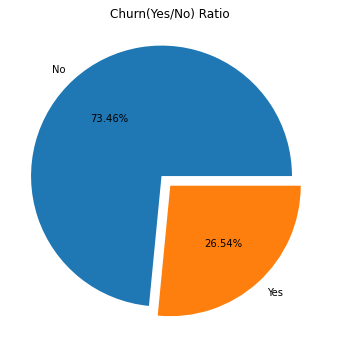

In [15]:
plt.rcParams['figure.figsize']=6,6
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('Churn(Yes/No) Ratio')
plt.show()

<AxesSubplot:>

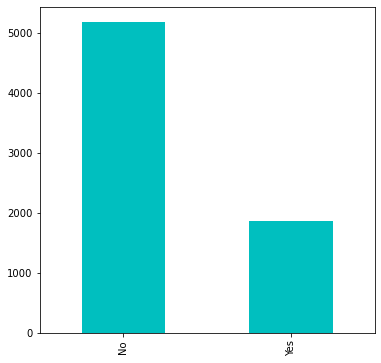

In [16]:
df['Churn'].value_counts().plot.bar(width=0.5,color='c')

- 属于不平衡数据集，流失用户占比达26.54%

- 用户属性分析

   - 将用户分为老年人以及其他
   - 分为男性以及女性

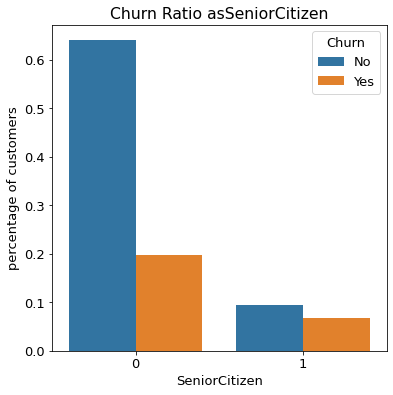

In [69]:
def barplot_percentages(feature,axis_name='percentage of customers'):
    g=(df.groupby(feature)['Churn'].value_counts()/df.shape[0]).to_frame()
    g.rename(columns={'Churn':axis_name},inplace=True)
    g.reset_index(inplace=True)
    
    ax=sns.barplot(x=feature,y=axis_name,hue='Churn',data=g)
    plt.rcParams.update({'font.size':13})
    plt.title('Churn Ratio as{}'.format(feature))
    plt.show
barplot_percentages('SeniorCitizen')


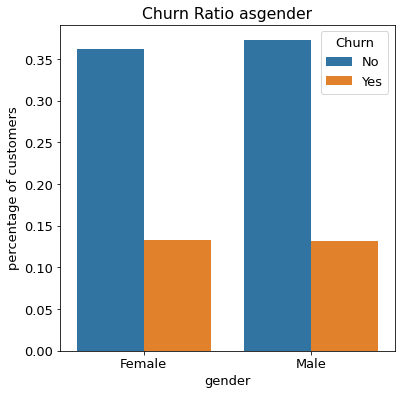

In [70]:
barplot_percentages('gender')

- 可以看出用户流失基本与性别无关

- 年老用户的流失率显著高于年轻用户

ValueError: Could not interpret input 'Partner'

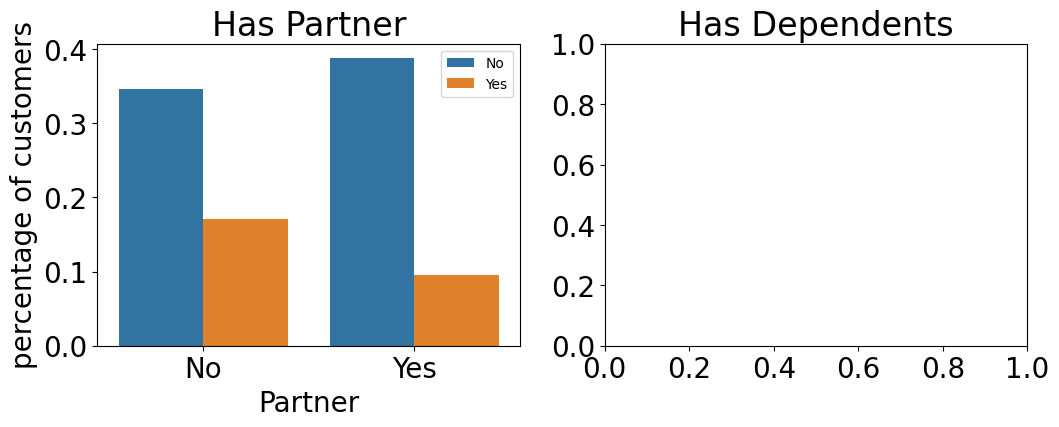

In [85]:
fig,axis=plt.subplots(1,2,figsize=(12,4),dpi=100)
    
g_list=['Partner','Dependents']
axis[0].set_title('Has Partner')
axis[1].set_title('Has Dependents')
axis_y='percentage of customers'
g=(df.groupby(g_list[0])['Churn'].value_counts()/df.shape[0]).to_frame()
g.rename(columns={'Churn':axis_y},inplace=True)
g.reset_index(inplace=True)
ax0=sns.barplot(x=g_list[i],y=axis_y,hue='Churn',data=g,ax=axis[0])
ax0.legend(fontsize=10)
g=(df.groupby(g_list[1])['Churn'].value_counts()/df.shape[0]).to_frame()
g.rename(columns={'Churn':axis_y},inplace=True)
g.reset_index(inplace=True)
ax1=sns.barplot(x=g_list[i],y=axis_y,hue='Churn',data=g,ax=axis[1])
ax1.legend(fontsize=10)
plt.show()
    

- 可以看出有伴侣或者有家属的客户更容易留存

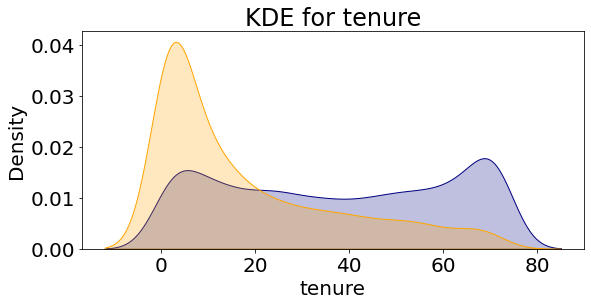

In [86]:
#核密度估计
plt.figure(figsize=(9,4))
plt.title('KDE for {}'.format('tenure'))
ax0=sns.kdeplot(df[df['Churn']=='No']['tenure'].dropna(),color='navy',label='Churn : No',shade=True)
ax1=sns.kdeplot(df[df['Churn']=='Yes']['tenure'].dropna(),color='orange',label='Churn:Yes',shade=True)
plt.xlabel('tenure')
plt.show()

- 小结
  - 有伴侣用户流失占比低于无伴侣用户
  - 有家属的用户较少
  - 用家属的用户流失占比低于无家属用户
  - 在网时间越长，流失率越低，符合一般经验
  - 在网时间达到三个月，流失率小于在网率，证明用户心理稳定期一般是三个月

### 服务属性分析

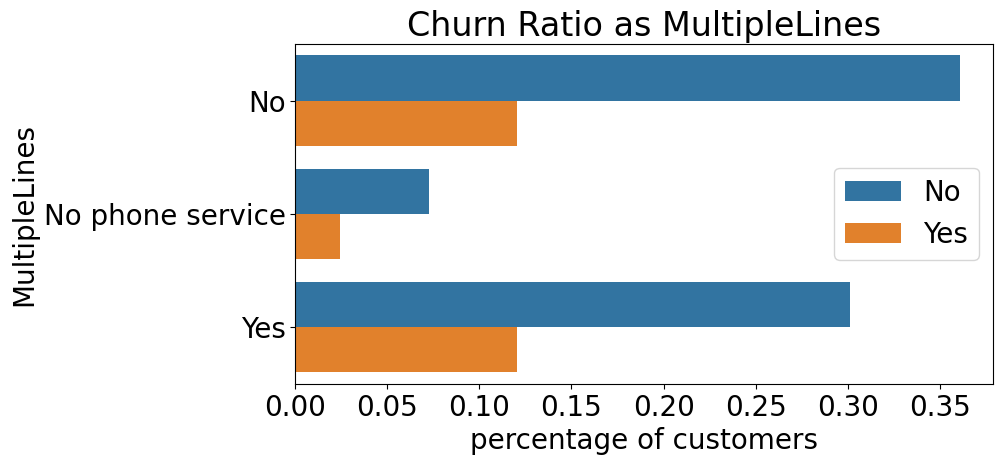

In [93]:
def fg(feature,yname):
    g=(df.groupby(feature)['Churn'].value_counts()/df.shape[0]).to_frame()
    g.rename(columns={'Churn':yname},inplace=True)
    g.reset_index(inplace=True)
    return g
plt.figure(figsize=(9,4.5),dpi=100)
g=fg('MultipleLines','percentage of customers')
ax=sns.barplot(x='percentage of customers',y='MultipleLines',hue='Churn',data=g)
plt.title('Churn Ratio as MultipleLines')
plt.legend(fontsize=20)
plt.show()

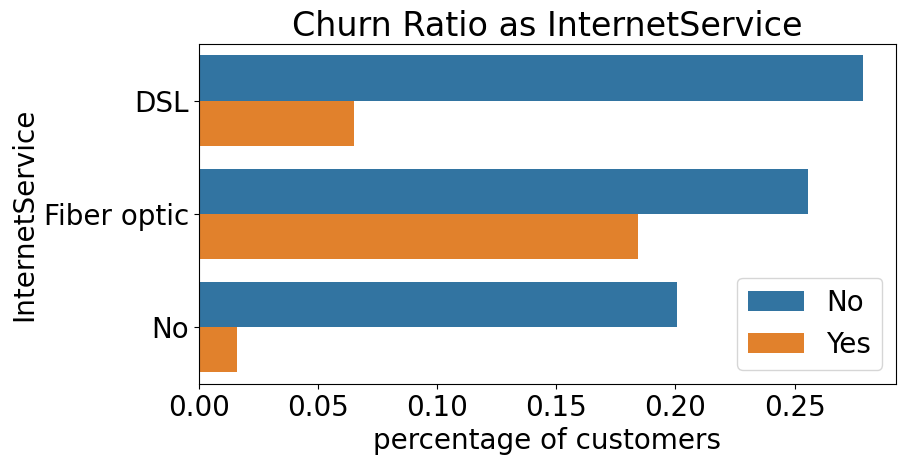

In [94]:
plt.figure(figsize=(9,4.5),dpi=100)
g=fg('InternetService','percentage of customers')
ax=sns.barplot(x='percentage of customers',y='InternetService',hue='Churn',data=g)
plt.title('Churn Ratio as InternetService')
plt.legend(fontsize=20)
plt.show()

- 电话服务整体对用户流失影响较小
- 单光纤用户的流失占比高

### 合同属性分析

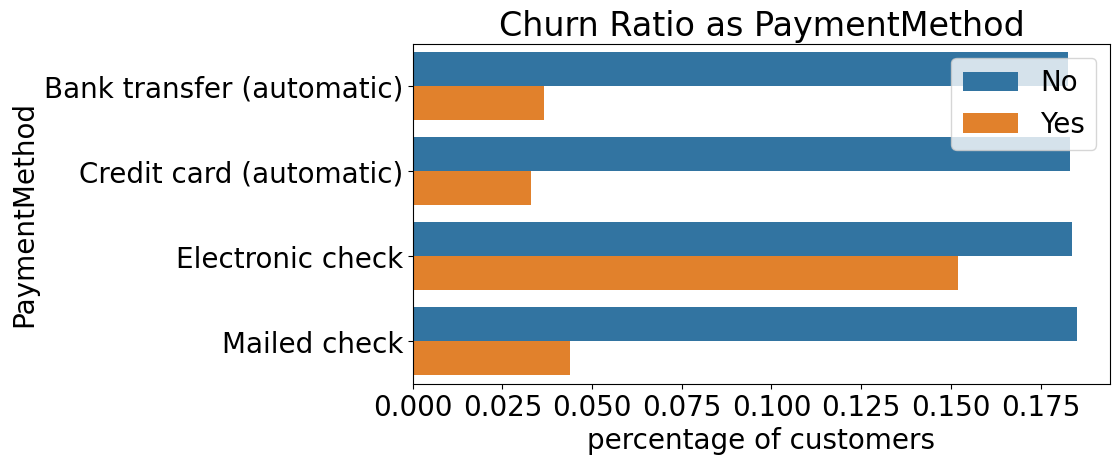

In [95]:
plt.figure(figsize=(9,4.5),dpi=100)
g=fg('PaymentMethod','percentage of customers')
ax=sns.barplot(x='percentage of customers',y='PaymentMethod',hue='Churn',data=g)
plt.title('Churn Ratio as PaymentMethod')
plt.legend(fontsize=20)
plt.show()

In [98]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

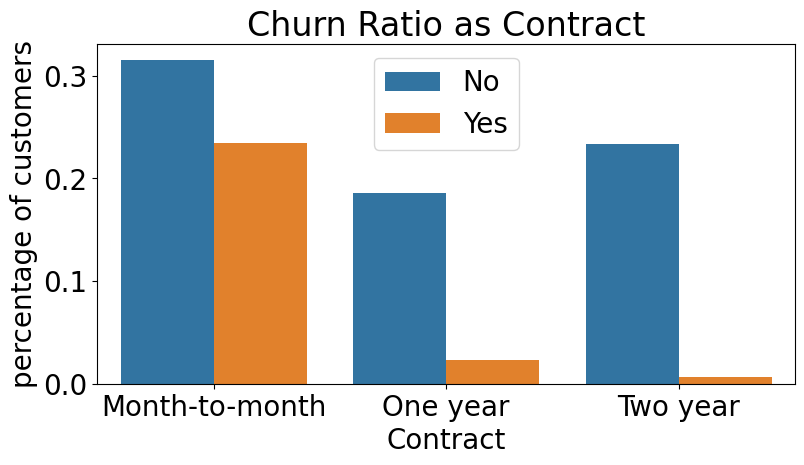

In [100]:
plt.figure(figsize=(9,4.5),dpi=100)
g=fg('Contract','percentage of customers')
ax=sns.barplot(x='Contract',y='percentage of customers',hue='Churn',data=g)
plt.title('Churn Ratio as Contract')
plt.legend(fontsize=20)
plt.show()

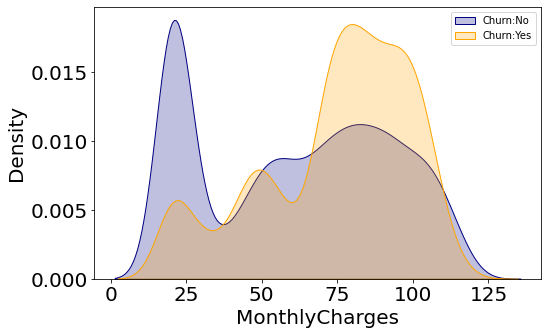

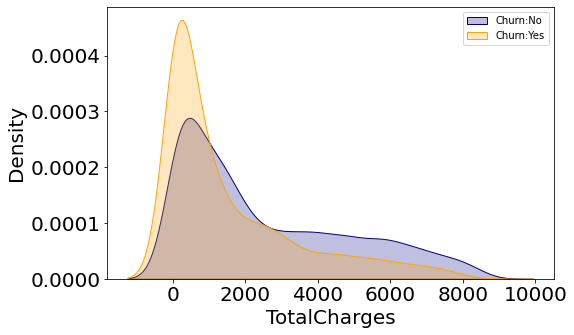

In [103]:
def kdeplot(feature):
    plt.figure(figsize=(8,5))
    ax0=sns.kdeplot(df[df['Churn']=='No'][feature].dropna(),color='navy',label='Churn:No',shade=True)
    ax1=sns.kdeplot(df[df['Churn']=='Yes'][feature].dropna(),color='orange',label='Churn:Yes',shade=True)
    plt.legend(fontsize=10)
    plt.xlabel(feature)
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')
plt.show()

- 小杰
   - 采用电子支票支付的用户流失率最高，推测该方式的使用体验较为一般
   - 签订合同对客户流失率影响为：按月签订》按年签订》按两年签订 证明长期合同最能保留客户
   - 月消费额在70-110之间用户流失率较高
   - 长期来看，用户总消费越高，流失率越低

## 用户流失预测

#### 数据清洗

In [108]:
customerID=df['customerID']
df.drop(['customerID'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- 对于连续特征采用标准化方式处理，对于离散特征，特征之间没有大小关系采用one_hot编码有大小关系采用数值映射

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [118]:
cateCols=[c for c in df.columns if df[c].dtype=='object' or c=='SeniorCitizen']
catedf=df[cateCols].copy()
catedf.head()
cateCols.remove('MultipleLines')
cateCols
catedf.drop(['MultipleLines'],axis=1,inplace=True)

In [119]:
for col in cateCols:
    if catedf[col].nunique()==2:
        catedf[col]=pd.factorize(catedf[col])[0]
    else:
        catedf=pd.get_dummies(catedf,columns=[col])
catedf['tenure']=df[['tenure']]
catedf['MonthlyCharges']=df['MonthlyCharges']
catedf['TotalCharges']=df['TotalCharges']
catedf.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,29.85,29.85
1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,34,56.95,1889.50
2,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,2,53.85,108.15
3,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,45,42.30,1840.75
4,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,2,70.70,151.65


In [120]:
catedf.shape

(7043, 38)

- 查看关联关系

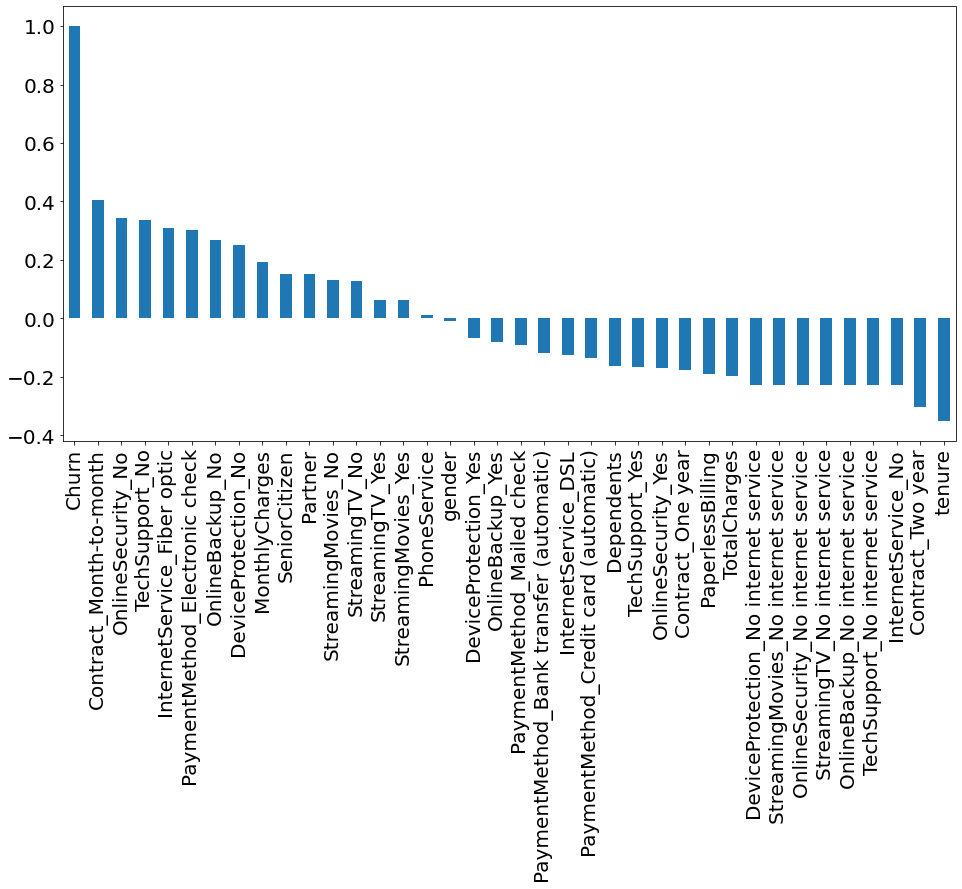

In [125]:
plt.figure(figsize=(16,8))
catedf.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [126]:
catedf.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
SeniorCitizen                              0.150889
Partner                                    0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
PhoneService                               0.011942
gender                                    -0.008612
DeviceProtection_Yes                      -0.066160
OnlineBackup_Yes                          -0.082255
PaymentMetho

In [131]:
dropFea = ['gender','PhoneService',
           'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
           'DeviceProtection_No internet service', 'TechSupport_No internet service',
           'StreamingTV_No internet service', 'StreamingMovies_No internet service',
           #'OnlineSecurity_No', 'OnlineBackup_No',
           #'DeviceProtection_No','TechSupport_No',
           #'StreamingTV_No', 'StreamingMovies_No',
           ]
catedf.drop(dropFea,axis=1,inplace=True)
target=catedf['Churn'].values
columns=catedf.columns.tolist()


KeyError: "['gender' 'PhoneService' 'OnlineSecurity_No internet service'\n 'OnlineBackup_No internet service' 'DeviceProtection_No internet service'\n 'TechSupport_No internet service' 'StreamingTV_No internet service'\n 'StreamingMovies_No internet service'] not found in axis"

### 构建训练集和测试集

In [133]:

features=catedf[columns].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=10)

### 构建模型

In [136]:
#构建多种分类器
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
classifiers=[
    SVC(random_state=1,kernel='rbf'),
    DecisionTreeClassifier(random_state=1,criterion='gini'),
    RandomForestClassifier(random_state=1,criterion='gini'),
    KNeighborsClassifier(metric='minkowski'),
    AdaBoostClassifier(random_state=1),
]
#分类器名称
classifier_names=[
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
    'adaboostclassifier',
]
#分类器参数
classifier_param_grid=[
    {'svc__C':[0.1],'svc__gamma':[0.01]},
    {'decisiontreeclassifier__max_depth':[6,9,11]},
    {'randomforestclassifier__n_estimators':range(1,11)},
    {'kneighborsclassifier__n_nerighbors':[4,6,8]},
    {'adaboostclassifier__n_estimators':[70,80,90]}
]

### 模型参数调优与评估

In [139]:
def GridSearchCV_work(pipeline,X_train,y_train,X_test,y_test,param_grid,score='accuracy_score'):
    response={}
    gridsearch=GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=3,scoring=score)
    search=gridsearch.fit(X_train,y_train)
    print('最优参数',search.best_params_)
    print('最右分数',search.best_score_)
    predict_y=gridsearch.predict(X_test)
    print('准确率 %.4f'%accuracy_score(y_test,predict_y))
    response['predict_y']=predict_y
    response['accuracy_score']=accuracy_score(y_test,predict_y)

for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    #采用 StandardScaler 方法对数据规范化：均值为0，方差为1的正态分布
    pipeline = Pipeline([
            #('scaler', StandardScaler()),
            #('pca',PCA),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, X_train, y_train, X_test, y_test, model_param_grid , score = 'accuracy')

最优参数 {'svc__C': 0.1, 'svc__gamma': 0.01}
最右分数 0.7520411785587505
准确率 0.7764
最优参数 {'decisiontreeclassifier__max_depth': 6}
最右分数 0.7838125665601704
准确率 0.7942
最优参数 {'randomforestclassifier__n_estimators': 10}
最右分数 0.7752928647497338
准确率 0.7857


ValueError: Invalid parameter n_nerighbors for estimator KNeighborsClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.